# LGMVIP 
## Task-3 : Music Recommendation System
## Beginner Level
## By: Harini Viswanathan

# Data Description

In this task, you will be asked to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set. The same rule applies to the testing set.

KKBOX provides a training data set consists of information of the first observable listening event for each unique user-song pair within a specific time duration. Metadata of each unique user and song pair is also provided. The use of public data to increase the level of accuracy of your prediction is encouraged.

The train and the test data are selected from users listening history in a given time period. Note that this time period is chosen to be before the WSDM-KKBox Churn Prediction time period. The train and test sets are split based on time, and the split of public/private are based on unique user/song pairs.

# train.csv

msno: user id

song_id: song id

source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.

source_screen_name: name of the layout a user sees.

source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

# test.csv
id: row id (will be used for submission)

msno: user id

song_id: song id

source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.

source_screen_name: name of the layout a user sees.

source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

# songs.csv
The songs. Note that data is in unicode.

song_id

song_length: in ms

genre_ids: genre category. Some songs have multiple genres and they are separated by |
artist_name

composer

lyricist

language

# members.csv
user information.

msno

city

bd: age. Note: this column has outlier values, please use your judgement.
gender

registered_via: registration method

registration_init_time: format %Y%m%d

expiration_date: format %Y%m%d

# song_extra_info.csv

song_id

song name - the name of the song.

isrc - International Standard Recording Code, theoretically can be used as an identity of a song. 

However, what worth to note is, ISRCs generated from providers have not been officially verified; 

therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. 

Multiple songs could share one ISRC since a single recording could be re-published several times.


# Refer this link to get datasets: https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

## Importing the standard libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import xgboost as xgb
from sklearn.model_selection import train_test_split
import datetime

## Importing and reading the datasets using pandas library.

In [2]:
train=pd.read_csv('C:\\Users\\HARINI\\Documents\\LGM_VIP_PROGRAMS\\DATA_SCIENCE\\DATASETS\\train.csv')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [3]:
test=pd.read_csv('C:\\Users\\HARINI\\Documents\\LGM_VIP_PROGRAMS\\DATA_SCIENCE\\DATASETS\\test.csv')
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [4]:
members=pd.read_csv('C:\\Users\\HARINI\\Documents\\LGM_VIP_PROGRAMS\\DATA_SCIENCE\\DATASETS\\members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [5]:
songs=pd.read_csv('C:\\Users\\HARINI\\Documents\\LGM_VIP_PROGRAMS\\DATA_SCIENCE\\DATASETS\\songs.csv')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


## Data Analysis First type Descriptive Analysis

In [6]:
print("Shape of a train dataset is :",train.shape)
print("Shape of a test dataset is :",test.shape)
print("Shape of a members dataset is:",members.shape)
print("Shape of a songs dataset is:",songs.shape)

Shape of a train dataset is : (7377418, 6)
Shape of a test dataset is : (2556790, 6)
Shape of a members dataset is: (34403, 7)
Shape of a songs dataset is: (2296320, 7)


In [7]:
print("Shape of a train dataset is :",train.columns)
print("Shape of a test dataset is :",test.columns)
print("Shape of a members dataset is:",members.columns)
print("Shape of a songs dataset is:",songs.columns)

Shape of a train dataset is : Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')
Shape of a test dataset is : Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')
Shape of a members dataset is: Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')
Shape of a songs dataset is: Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')


In [8]:
print("Shape of a train dataset is :",train.info())
print("Shape of a test dataset is :",test.info())
print("Shape of a members dataset is:",members.info())
print("Shape of a songs dataset is:",songs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB
Shape of a train dataset is : None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB
Shape of a test dataset is : None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (t

## Data Pre-processing

In [9]:
#1% sample of items
train = train.sample(frac=0.01)

In [10]:
train.shape

(73774, 6)

In [11]:
train = pd.merge(train,songs,on='song_id',how='left')

In [12]:
train.shape

(73774, 12)

In [13]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,+iNONM0zRhrm27/LkL1KPX5B7emXOb56Grvbt6B9KRc=,HyYt42lITr57vxTydacLAvx8pukSUOZYcPj2jeWjPvM=,my library,Local playlist more,local-library,1,221309,1616,Martin Garrix,Martijn Garritsen| John Martin| Michel Zitron|...,Martijn Garritsen| John Martin| Michel Zitron|...,52.0
1,ikWVeuTa//zfjEjmkZReYnXG98p5EOvGz8OeXAv4AXU=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,discover,Discover Feature,song-based-playlist,1,227343,465,謝和弦 (R-chord),R-chord,R-chord,3.0
2,t5/EGA6NOfnMh5MQ9/luFY8GqOIs2tZQ5vvyclYLCNA=,/wJbvG2RVCDwJSeseWDnMnvvlIcijhY5jK4WQVPjf3U=,my library,Local playlist more,local-playlist,1,110445,726,唱唱跳跳學兒歌系列,Heikens,王毓騵,-1.0
3,iAGMo6SuHukbGEHPBSD+3pqI+Bx2J43vXRn08lE4kxk=,Qt+sfv4DKmrgmmbd6h8Rw8oryyeoW68bp8DHD98nSTs=,my library,Local playlist more,local-library,0,266553,458,林宥嘉 (Yoga Lin),鄭楠,鄭楠/徐旻鈴,3.0
4,EGX+0TMLsj/REhIBov/EuakBXOn2uusOXVRkEuOLzTQ=,BltcEkjMXRM+A8HVc+uUYZqPXGfPlTTYfTu+rTw9+C0=,my library,Local playlist more,local-library,1,259392,458,林宥嘉 (Yoga Lin),梁翹柏,李焯雄,3.0


## Merging train and members datasets

In [14]:
train = pd.merge(train,members,on='msno',how='left')

In [15]:
train.shape

(73774, 18)

In [16]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,+iNONM0zRhrm27/LkL1KPX5B7emXOb56Grvbt6B9KRc=,HyYt42lITr57vxTydacLAvx8pukSUOZYcPj2jeWjPvM=,my library,Local playlist more,local-library,1,221309,1616,Martin Garrix,Martijn Garritsen| John Martin| Michel Zitron|...,Martijn Garritsen| John Martin| Michel Zitron|...,52.0,5,21,female,3,20120715,20170310
1,ikWVeuTa//zfjEjmkZReYnXG98p5EOvGz8OeXAv4AXU=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,discover,Discover Feature,song-based-playlist,1,227343,465,謝和弦 (R-chord),R-chord,R-chord,3.0,22,35,male,9,20160301,20180604
2,t5/EGA6NOfnMh5MQ9/luFY8GqOIs2tZQ5vvyclYLCNA=,/wJbvG2RVCDwJSeseWDnMnvvlIcijhY5jK4WQVPjf3U=,my library,Local playlist more,local-playlist,1,110445,726,唱唱跳跳學兒歌系列,Heikens,王毓騵,-1.0,6,42,male,7,20131128,20171006
3,iAGMo6SuHukbGEHPBSD+3pqI+Bx2J43vXRn08lE4kxk=,Qt+sfv4DKmrgmmbd6h8Rw8oryyeoW68bp8DHD98nSTs=,my library,Local playlist more,local-library,0,266553,458,林宥嘉 (Yoga Lin),鄭楠,鄭楠/徐旻鈴,3.0,4,25,female,7,20110324,20171004
4,EGX+0TMLsj/REhIBov/EuakBXOn2uusOXVRkEuOLzTQ=,BltcEkjMXRM+A8HVc+uUYZqPXGfPlTTYfTu+rTw9+C0=,my library,Local playlist more,local-library,1,259392,458,林宥嘉 (Yoga Lin),梁翹柏,李焯雄,3.0,4,0,NaN,9,20110827,20170806


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73497 non-null  object 
 3   source_screen_name      69547 non-null  object 
 4   source_type             73530 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73774 non-null  int64  
 7   genre_ids               72563 non-null  object 
 8   artist_name             73774 non-null  object 
 9   composer                56913 non-null  object 
 10  lyricist                41909 non-null  object 
 11  language                73773 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44256 non-null

In [18]:
train.describe(include="all")

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
count,73774,73774,73497,69547,73530,73774.000000,7.377400e+04,72563,73774,56913,41909,73773.000000,73774.000000,73774.000000,44256,73774.000000,7.377400e+04,7.377400e+04
unique,18813,27506,8,18,12,NaN,NaN,233,6649,9981,5680,NaN,NaN,NaN,2,NaN,NaN,NaN
top,o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN,NaN,465,Various Artists,周杰倫,阿信,NaN,NaN,NaN,male,NaN,NaN,NaN
freq,61,142,36747,32084,22545,NaN,NaN,37258,2968,1968,1521,NaN,NaN,NaN,22820,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.502941,2.452282e+05,NaN,NaN,NaN,NaN,18.589484,7.534321,17.631537,NaN,6.801000,2.012811e+07,2.017154e+07
std,NaN,NaN,NaN,NaN,NaN,0.499995,6.453766e+04,NaN,NaN,NaN,NaN,21.181338,6.643711,22.386356,NaN,2.274929,3.016396e+04,3.955141e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000,2.879000e+03,NaN,NaN,NaN,NaN,-1.000000,1.000000,-38.000000,NaN,3.000000,2.004033e+07,2.004102e+07
25%,NaN,NaN,NaN,NaN,NaN,0.000000,2.151440e+05,NaN,NaN,NaN,NaN,3.000000,1.000000,0.000000,NaN,4.000000,2.011063e+07,2.017091e+07
50%,NaN,NaN,NaN,NaN,NaN,1.000000,2.419200e+05,NaN,NaN,NaN,NaN,3.000000,5.000000,21.000000,NaN,7.000000,2.013102e+07,2.017092e+07
75%,NaN,NaN,NaN,NaN,NaN,1.000000,2.723000e+05,NaN,NaN,NaN,NaN,52.000000,13.000000,29.000000,NaN,9.000000,2.015102e+07,2.017101e+07


## Checking the Missing Values 

In [19]:
train.isnull().sum()/train.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.375471
source_screen_name         5.729661
source_type                0.330740
target                     0.000000
song_length                0.000000
genre_ids                  1.641500
artist_name                0.000000
composer                  22.854935
lyricist                  43.192724
language                   0.001355
city                       0.000000
bd                         0.000000
gender                    40.011386
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

## Count Plots for target,source_type,source_system_tab and source_screen_name in train dataset

In [20]:
def count_plot(data,x,hue,type):
    plt.figure(figsize=(20,10))
    sns.set(font_scale=2)
    sns.countplot(x=x,hue=hue,data=data)
    plt.xlabel(x,fontsize=30)
    plt.ylabel('count',fontsize=30)
    plt.xticks(rotation='90')
    plt.title('Count plot for {0} in {1} data'.format(x,type),fontsize=30)
    plt.tight_layout()

In [21]:
def count_plot_function(data,x,hue,type):
    plt.figure(figsize=(20,10))
    sns.set(font_scale=2)
    sns.countplot(x=x,data=data)
    plt.xlabel(x,fontsize=30)
    plt.ylabel('count',fontsize=30)
    plt.xticks(rotation='90')
    plt.title('Count plot',fontsize=30)
    plt.tight_layout()

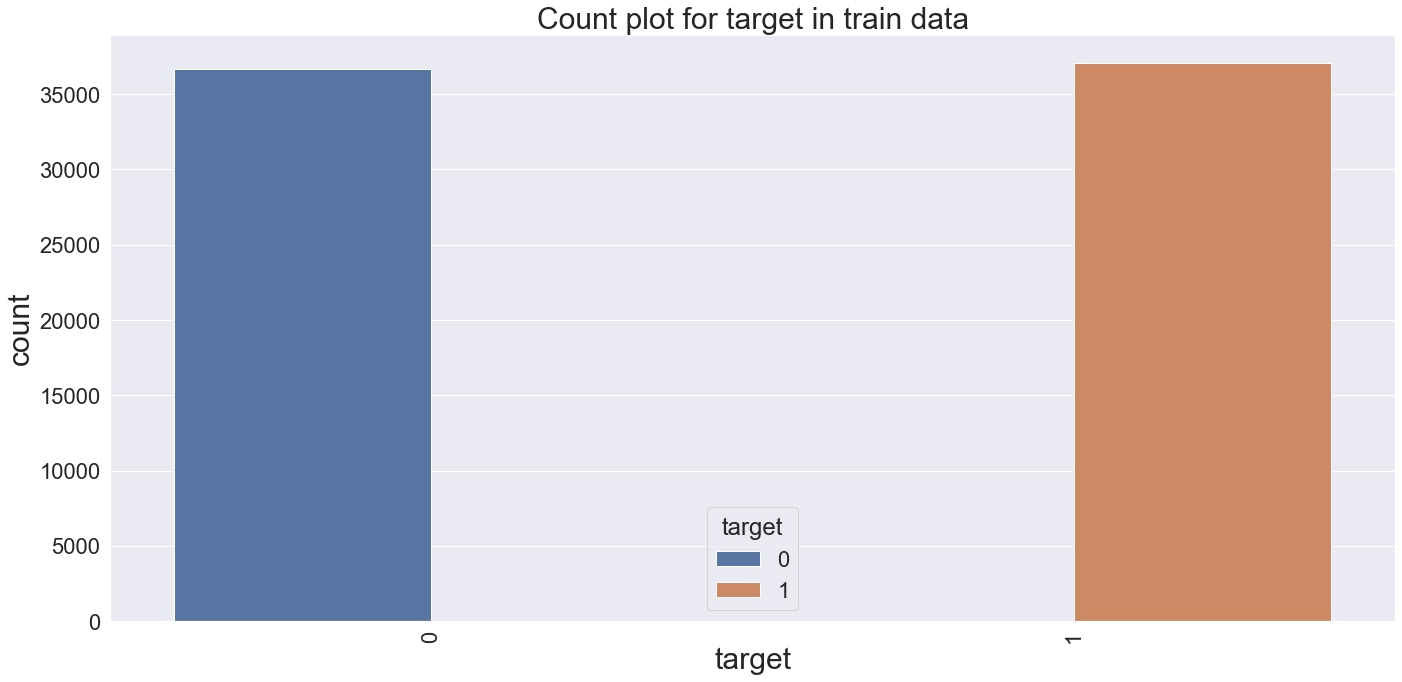

In [22]:
count_plot(train,'target','target','train')

In [23]:
train['source_type'].value_counts()

local-library             22545
online-playlist           19464
local-playlist            10658
radio                      4958
album                      4742
top-hits-for-artist        4396
song                       2574
song-based-playlist        2079
listen-with                1955
topic-article-playlist      118
artist                       34
my-daily-playlist             7
Name: source_type, dtype: int64

In [24]:
train['target'].value_counts()

1    37104
0    36670
Name: target, dtype: int64

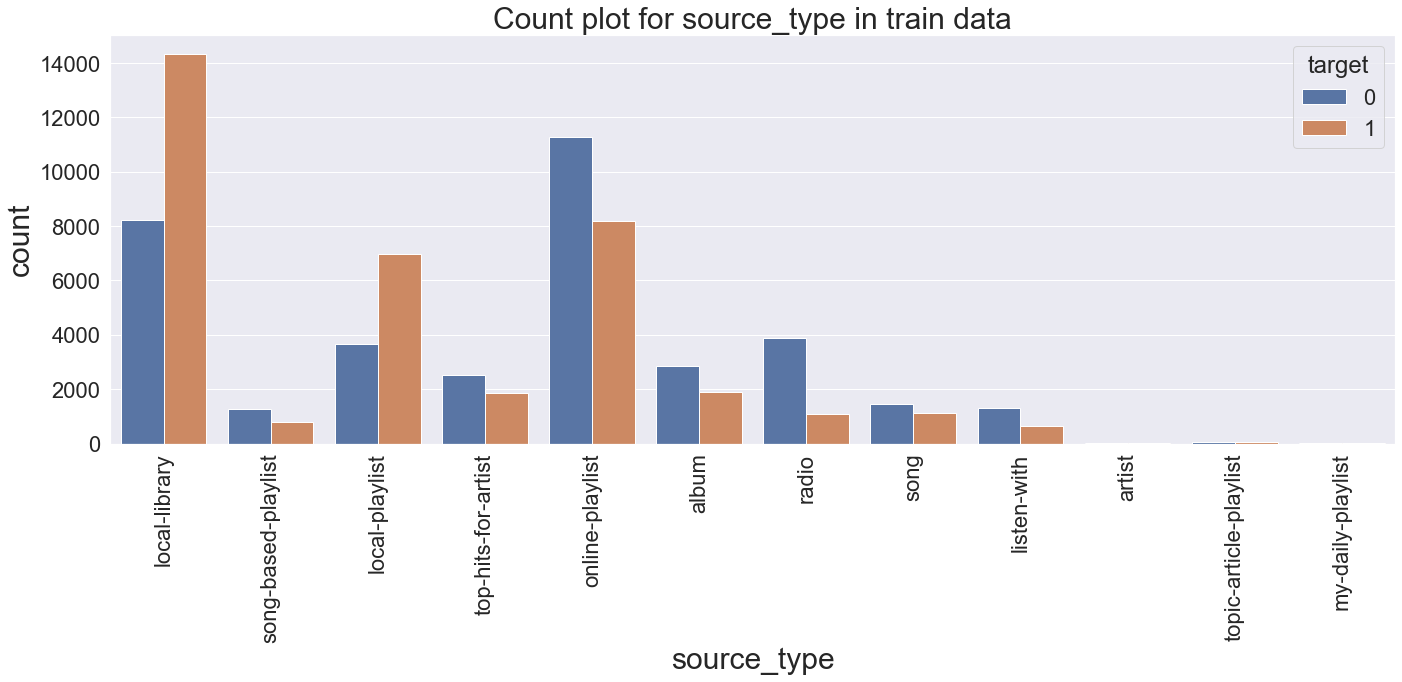

In [25]:
count_plot(train,'source_type','target','train')

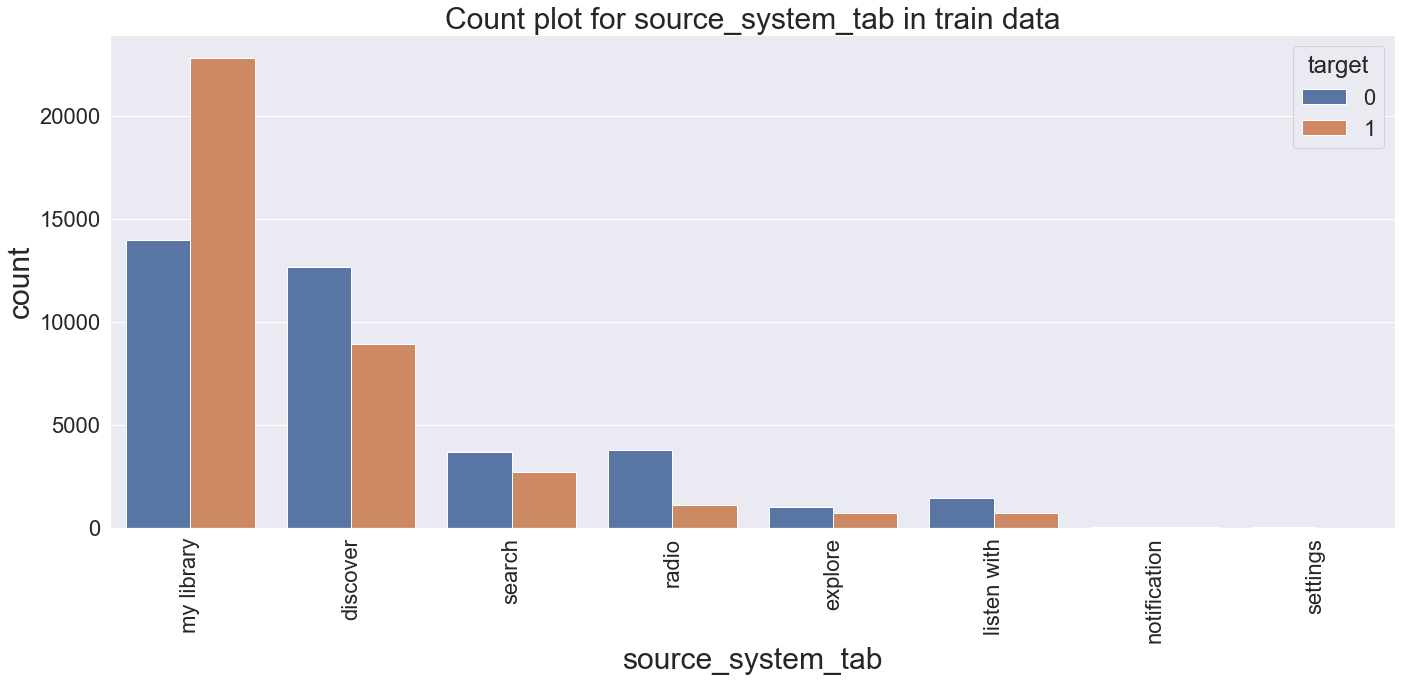

In [26]:
count_plot(train,'source_system_tab','target','train')

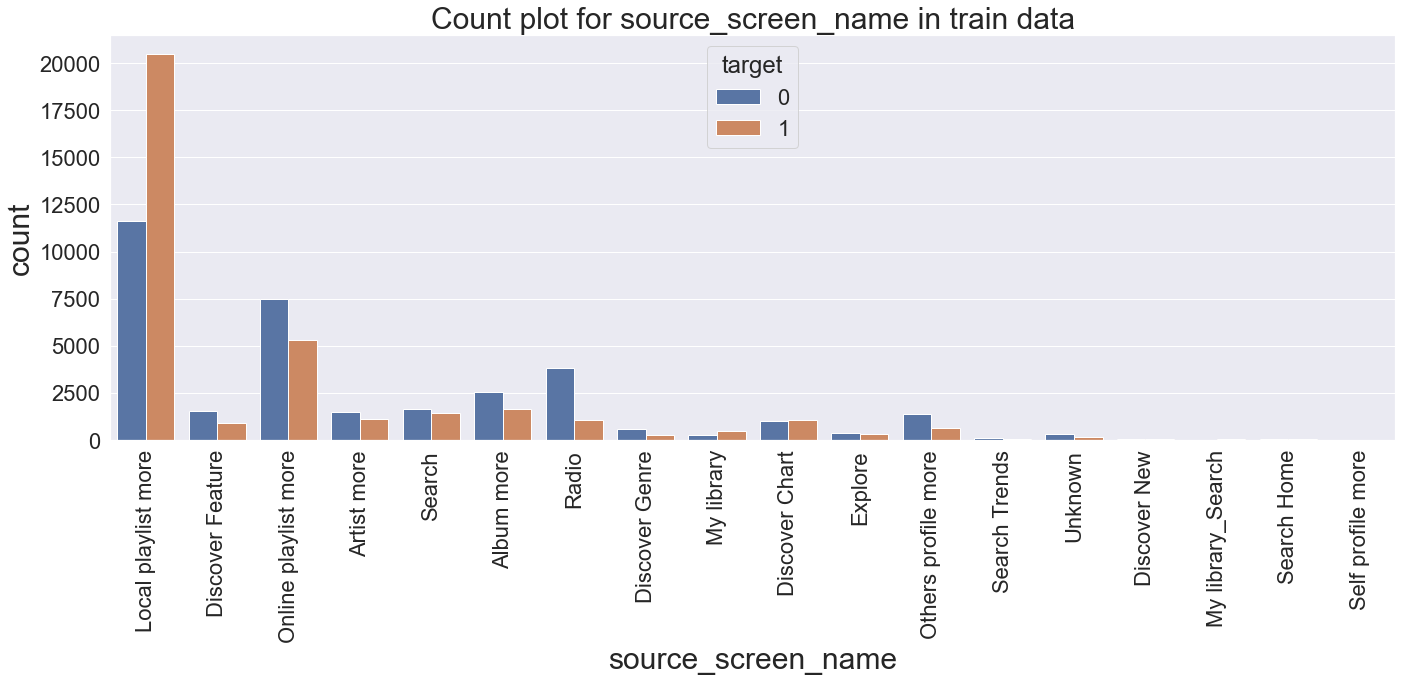

In [27]:
count_plot(train,'source_screen_name','target','train')

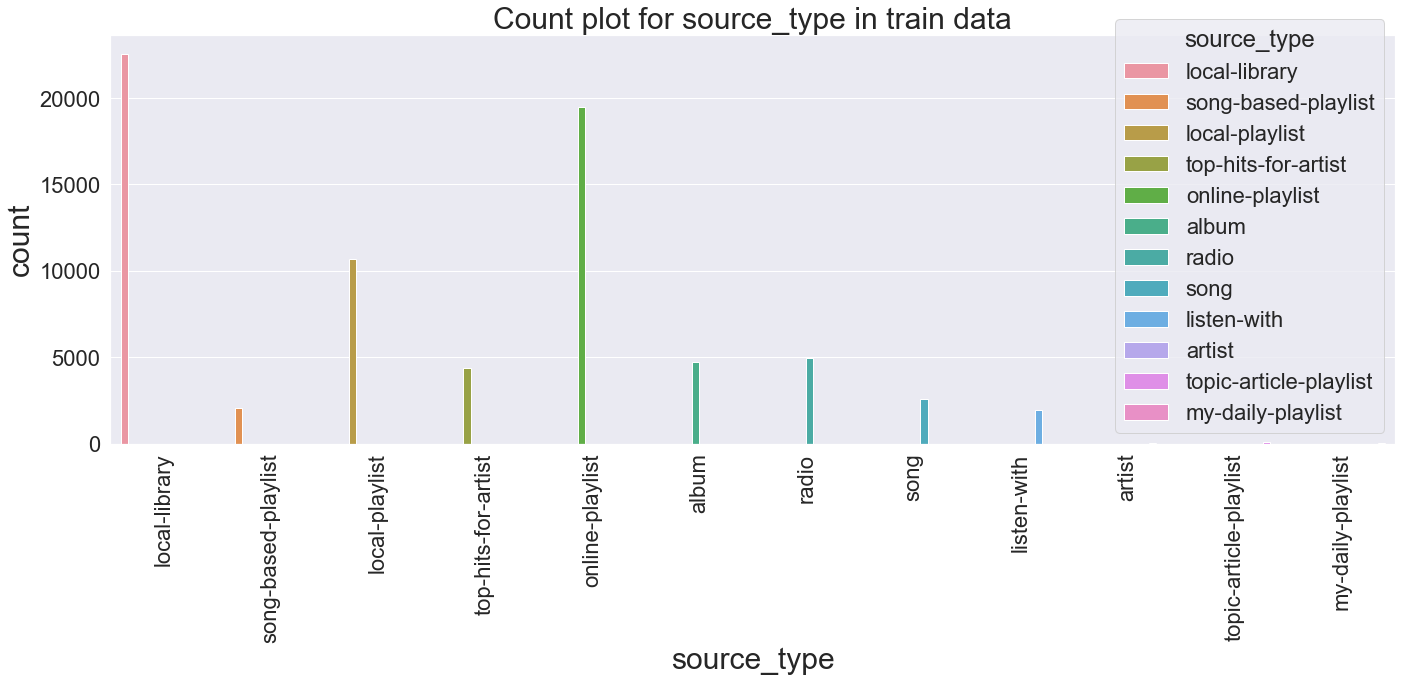

In [28]:
count_plot(train,'source_type','source_type','train')

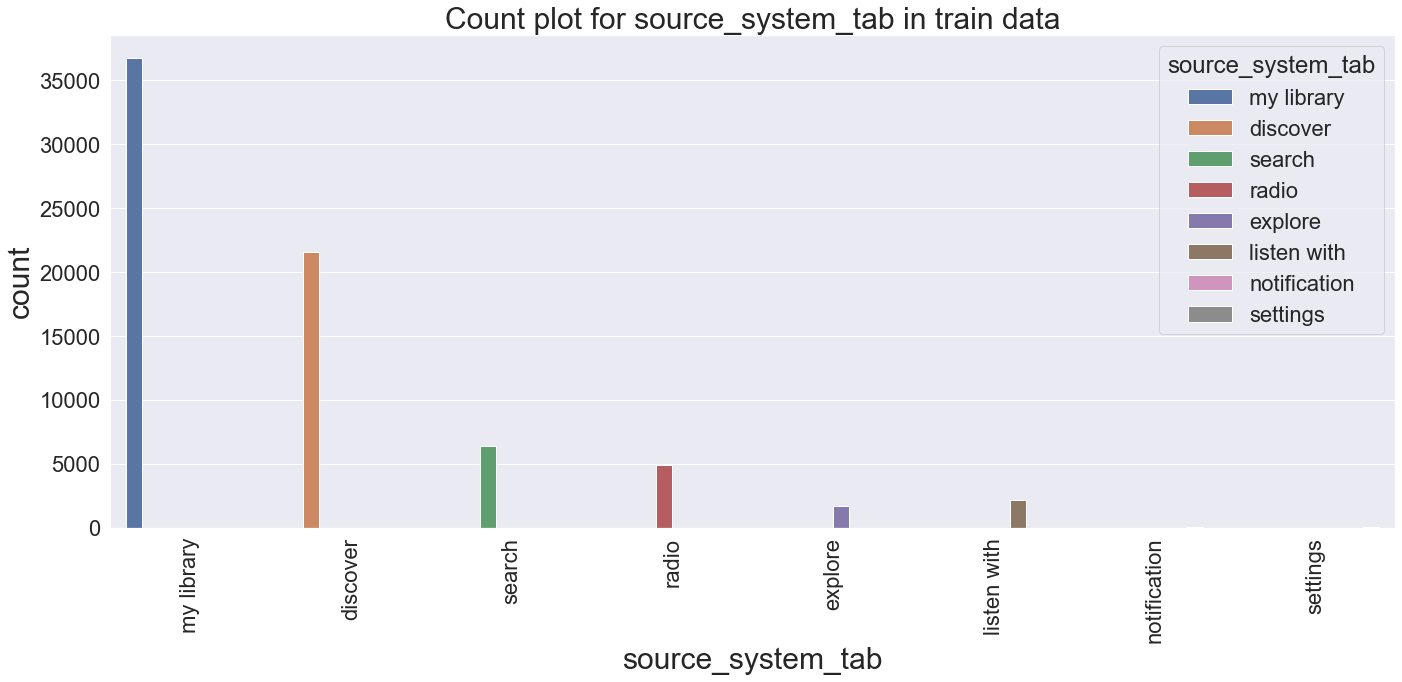

In [29]:
count_plot(train,'source_system_tab','source_system_tab','train')

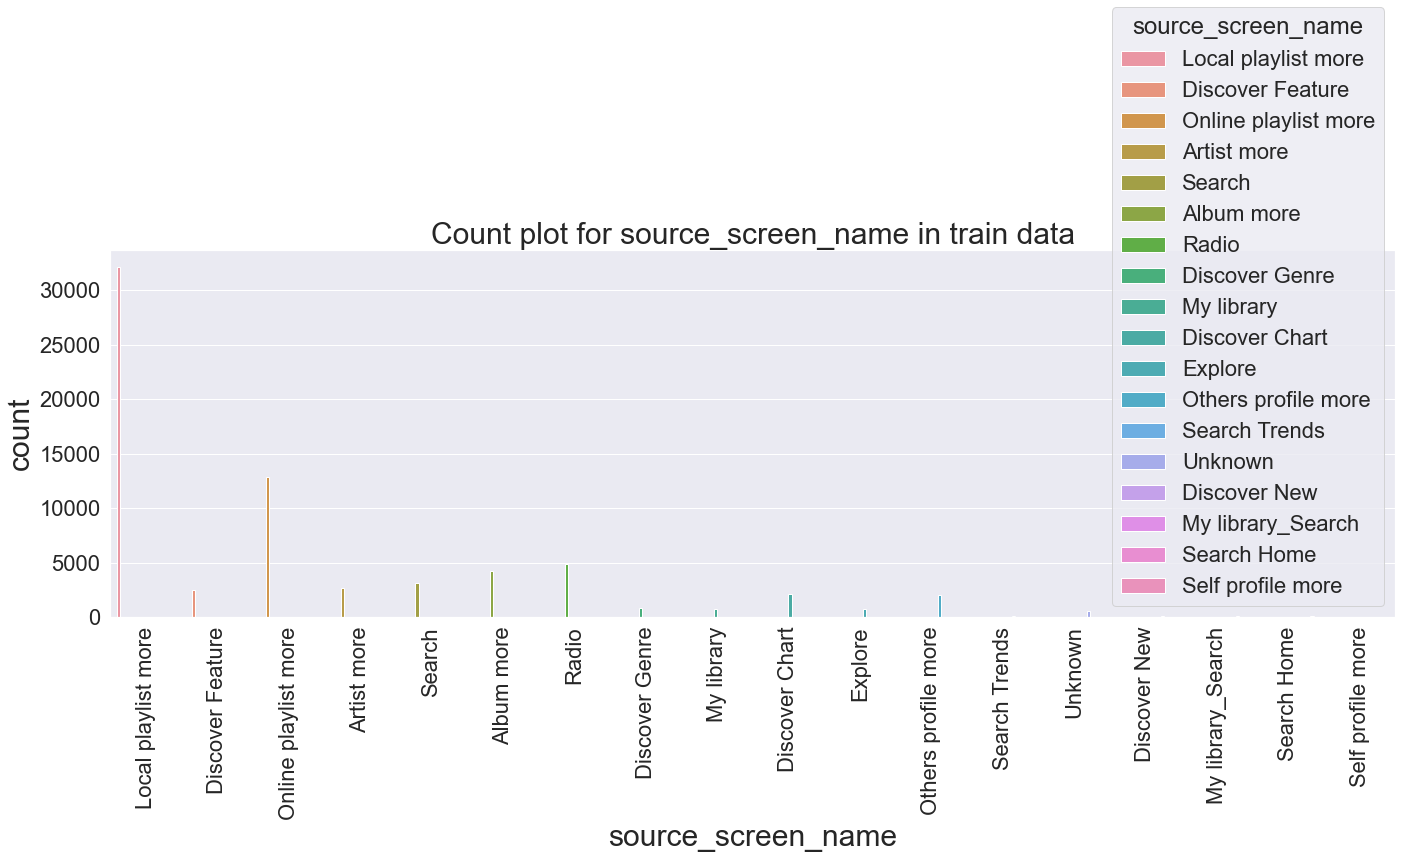

In [30]:
count_plot(train,'source_screen_name','source_screen_name','train')

In [31]:
#Replace NA
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()]='unknown'
train=train.fillna(value=0)

## Changing the format of date in registration_init_time and expiration_date

In [32]:
train.registration_init_time=pd.to_datetime(train.registration_init_time,format="%Y%m%d",errors="ignore")
train['registration_init_time_year']=train['registration_init_time'].dt.year
train['registration_init_time_year']=train['registration_init_time'].dt.month
train['registration_init_time_year']=train['registration_init_time'].dt.day

In [33]:
train.expiration_date=pd.to_datetime(train.expiration_date,format="%Y%m%d",errors="ignore")
train['expiration_date_year']=train['expiration_date'].dt.year
train['expiration_date_month']=train['expiration_date'].dt.month
train['expiration_date_day']=train['expiration_date'].dt.day

In [34]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,expiration_date_year,expiration_date_month,expiration_date_day
0,+iNONM0zRhrm27/LkL1KPX5B7emXOb56Grvbt6B9KRc=,HyYt42lITr57vxTydacLAvx8pukSUOZYcPj2jeWjPvM=,my library,Local playlist more,local-library,1,221309,1616,Martin Garrix,Martijn Garritsen| John Martin| Michel Zitron|...,...,5,21,female,3,2012-07-15,2017-03-10,15,2017,3,10
1,ikWVeuTa//zfjEjmkZReYnXG98p5EOvGz8OeXAv4AXU=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,discover,Discover Feature,song-based-playlist,1,227343,465,謝和弦 (R-chord),R-chord,...,22,35,male,9,2016-03-01,2018-06-04,1,2018,6,4
2,t5/EGA6NOfnMh5MQ9/luFY8GqOIs2tZQ5vvyclYLCNA=,/wJbvG2RVCDwJSeseWDnMnvvlIcijhY5jK4WQVPjf3U=,my library,Local playlist more,local-playlist,1,110445,726,唱唱跳跳學兒歌系列,Heikens,...,6,42,male,7,2013-11-28,2017-10-06,28,2017,10,6
3,iAGMo6SuHukbGEHPBSD+3pqI+Bx2J43vXRn08lE4kxk=,Qt+sfv4DKmrgmmbd6h8Rw8oryyeoW68bp8DHD98nSTs=,my library,Local playlist more,local-library,0,266553,458,林宥嘉 (Yoga Lin),鄭楠,...,4,25,female,7,2011-03-24,2017-10-04,24,2017,10,4
4,EGX+0TMLsj/REhIBov/EuakBXOn2uusOXVRkEuOLzTQ=,BltcEkjMXRM+A8HVc+uUYZqPXGfPlTTYfTu+rTw9+C0=,my library,Local playlist more,local-library,1,259392,458,林宥嘉 (Yoga Lin),梁翹柏,...,4,0,unknown,9,2011-08-27,2017-08-06,27,2017,8,6


In [35]:
#Changing Dates to category
train['registration_init_time']=train['registration_init_time'].astype('category')
train['expiration_date']=train['expiration_date'].astype('category')

In [36]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,expiration_date_year,expiration_date_month,expiration_date_day
0,+iNONM0zRhrm27/LkL1KPX5B7emXOb56Grvbt6B9KRc=,HyYt42lITr57vxTydacLAvx8pukSUOZYcPj2jeWjPvM=,my library,Local playlist more,local-library,1,221309,1616,Martin Garrix,Martijn Garritsen| John Martin| Michel Zitron|...,...,5,21,female,3,2012-07-15,2017-03-10,15,2017,3,10
1,ikWVeuTa//zfjEjmkZReYnXG98p5EOvGz8OeXAv4AXU=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,discover,Discover Feature,song-based-playlist,1,227343,465,謝和弦 (R-chord),R-chord,...,22,35,male,9,2016-03-01,2018-06-04,1,2018,6,4
2,t5/EGA6NOfnMh5MQ9/luFY8GqOIs2tZQ5vvyclYLCNA=,/wJbvG2RVCDwJSeseWDnMnvvlIcijhY5jK4WQVPjf3U=,my library,Local playlist more,local-playlist,1,110445,726,唱唱跳跳學兒歌系列,Heikens,...,6,42,male,7,2013-11-28,2017-10-06,28,2017,10,6
3,iAGMo6SuHukbGEHPBSD+3pqI+Bx2J43vXRn08lE4kxk=,Qt+sfv4DKmrgmmbd6h8Rw8oryyeoW68bp8DHD98nSTs=,my library,Local playlist more,local-library,0,266553,458,林宥嘉 (Yoga Lin),鄭楠,...,4,25,female,7,2011-03-24,2017-10-04,24,2017,10,4
4,EGX+0TMLsj/REhIBov/EuakBXOn2uusOXVRkEuOLzTQ=,BltcEkjMXRM+A8HVc+uUYZqPXGfPlTTYfTu+rTw9+C0=,my library,Local playlist more,local-library,1,259392,458,林宥嘉 (Yoga Lin),梁翹柏,...,4,0,unknown,9,2011-08-27,2017-08-06,27,2017,8,6


In [37]:
#object date to category
for col in train.select_dtypes(include=['object']).columns:
    train[col]=train[col].astype('category')
#Encoding categorical features
for col in train.select_dtypes(include=['category']).columns:
    train[col]=train[col].cat.codes

In [38]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,expiration_date_year,expiration_date_month,expiration_date_day
0,195,8515,3,7,3,1,221309,54,2749,4893,...,5,21,0,3,2032,380,15,2017,3,10
1,13751,11844,0,3,9,1,227343,134,6177,5700,...,22,35,1,9,3350,830,1,2018,6,4
2,16832,800,3,7,4,1,110445,168,5067,2791,...,6,42,1,7,2527,590,28,2017,10,6
3,13594,12365,3,7,3,0,266553,131,5585,9453,...,4,25,0,7,1662,588,24,2017,10,4
4,4696,5893,3,7,3,1,259392,131,5585,8771,...,4,0,2,9,1818,529,27,2017,8,6


## Finding Corrleation 

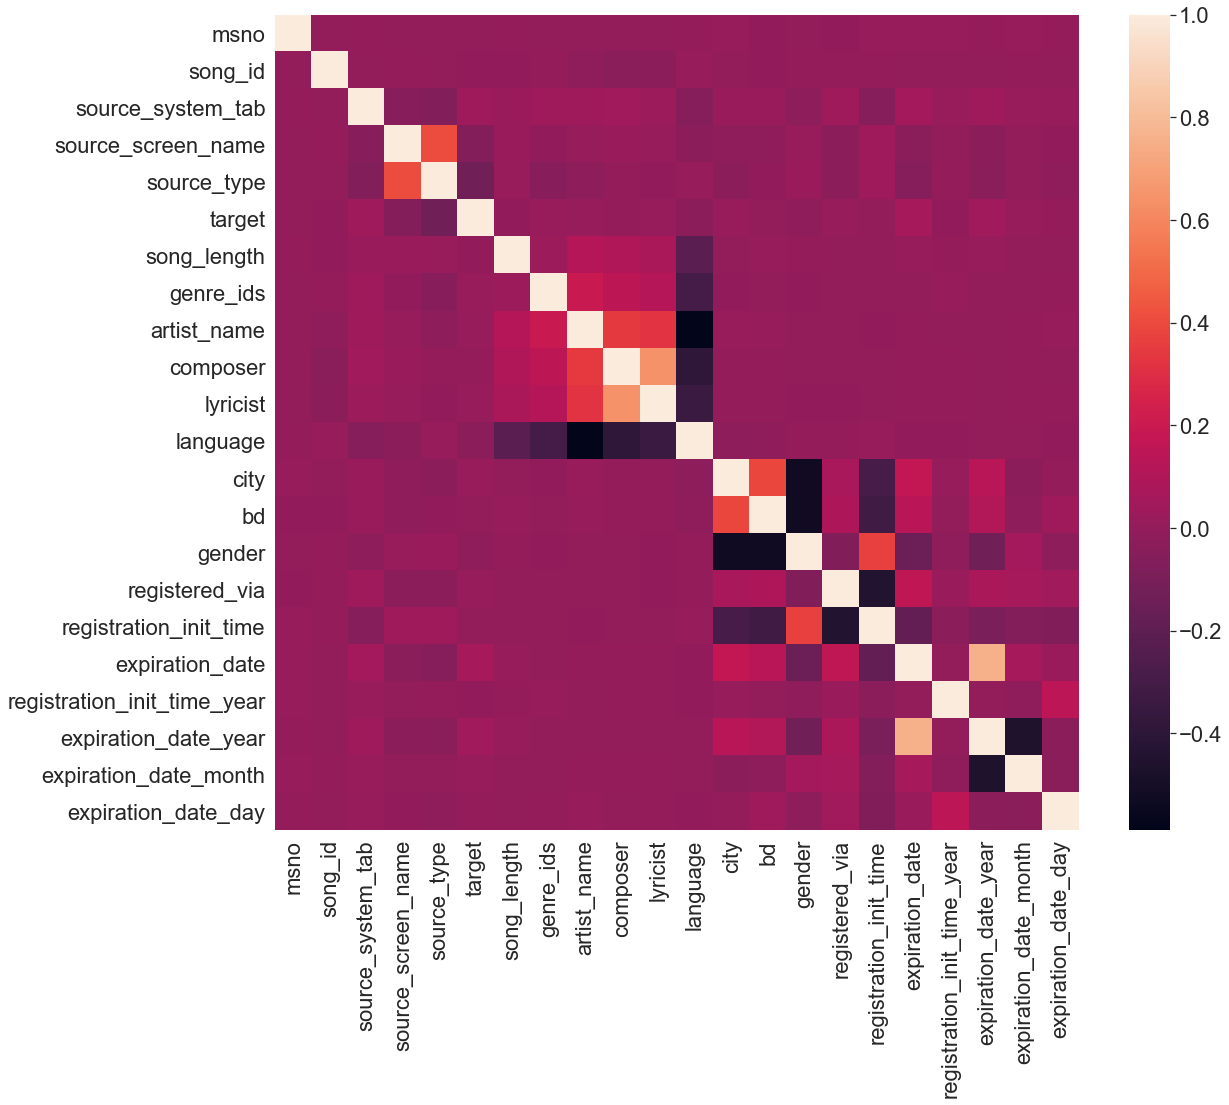

In [39]:
#correlation matrix
plt.figure(figsize=(18,15))
sns.heatmap(train.corr())
plt.show()

## Random Forest
### Selected the most informative columns using random forest.

In [40]:
train1=train.copy()

In [41]:
X_train=train1.drop(['target'],axis=1).values
Y_Train=train1['target'].values

In [42]:
X_train.shape

(73774, 21)

In [45]:
Y_Train.shape

(73774,)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_Train,test_size=0.25)

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=250,max_depth=25,random_state=0)
clf.fit(X_train,Y_Train)

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=0)

## Removing Unecessary Columns from the train dataset 

In [49]:
train_plot=pd.DataFrame({'features':train.columns[train.columns !='target'],'importances':clf.feature_importances_})
train_plot=train_plot.sort_values('importances',ascending=False)

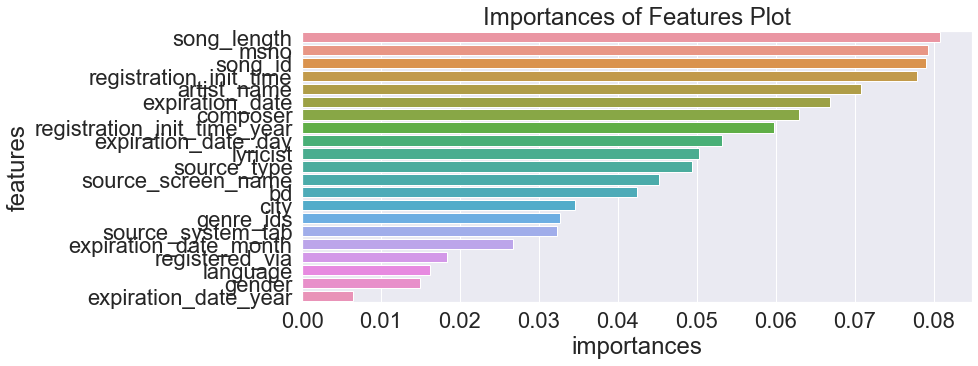

In [53]:
plt.figure(figsize=[12,5])
sns.barplot(x=train_plot.importances,y=train_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [54]:
train2=train.copy()

In [56]:
#Drop columns with importances < 0.04
train2 = train2.drop(train_plot.features[train_plot.importances<0.04].tolist(),1)

In [57]:
#Select columns
train2.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'song_length', 'artist_name', 'composer', 'lyricist', 'bd',
       'registration_init_time', 'expiration_date',
       'registration_init_time_year', 'expiration_date_day'],
      dtype='object')

## XGboost

In [58]:
#Train and test split
train3=train.copy()

In [60]:
X_train1=train3.drop(['target'],axis=1).values
Y_Train1=train3['target'].values

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X_train1,Y_Train1,test_size=0.25)

In [63]:
#Create model
model2=xgb.XGBClassifier(learning_rate=0.1,max_depth=15,min_child_weight=5,n_estimators=250)
model2.fit(X_train1,Y_Train1)

[16:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=15, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
X_train1.shape

(73774, 21)

In [65]:
#Predicting
Prediction = model2.predict(x_test)

In [66]:
from sklearn import metrics

In [68]:
print(metrics.classification_report(y_test,Prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9187
           1       0.96      0.98      0.97      9257

    accuracy                           0.97     18444
   macro avg       0.97      0.97      0.97     18444
weighted avg       0.97      0.97      0.97     18444

